# Random Shopping Cart



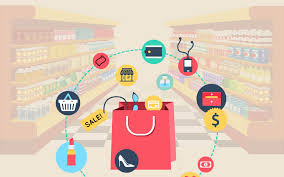

It is a dataset that contains a list of items sorted into a set of shopping carts.

# Importing the libraries

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Data Cleaning and Preprocessing
Since the provided CSV file has variable length transaction and no header, first of all we need to find the maximum number items in a transaction. So read transaction in a single columns of dataframe and use commas(,) to count number of items in each transaction.

In [2]:
# Data Loading
dataset = pd.read_csv('dataset.csv', header = None, sep='^')

In [3]:
dataset.head()

,0
0,"1/1/2000yogurt, pork, sandwich bags, lunch mea..."
1,"1/1/2000toilet paper, shampoo, hand soap, waff..."
2,"2/1/2000soda, pork, soap, ice cream, toilet pa..."
3,"2/1/2000cereals, juice, lunch meat, soda, toil..."
4,"2/1/2000sandwich loaves, pasta, tortillas, mix..."


In [4]:
max_col_count = max([row.count(',') for row in dataset[0]])

In [7]:
max_col_count

34

In [8]:
dataset = pd.read_csv('dataset.csv', header=None, names=list(range(max_col_count)))

Since items in csv file are separated by ,_ strip each item

In [9]:
for col in dataset.columns:
    dataset[col] = dataset[col].str.strip()

In [10]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1/1/2000yogurt,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2000toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2000soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,,NaN,NaN
3,2/1/2000cereals,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/1/2000sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,all- purpose,soda,yogurt,,NaN,NaN,NaN,NaN,NaN,NaN


Separate date and text from first column.

In [11]:
def strip_date_text(s):
    match = re.search(r'(\d{1,2}/\d{1,2}/\d{4})([a-z /-]+)', s)
    date = datetime.strptime(match.groups()[0], '%d/%m/%Y').date()
    return date, match.groups()[1]

In [12]:
df = pd.concat([pd.DataFrame(dataset[0].apply(strip_date_text).tolist()), dataset.iloc[:, 1:]], axis=1, ignore_index=True)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2000-01-01,yogurt,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-01,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-02,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,,NaN,NaN
3,2000-01-02,cereals,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-02,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,...,all- purpose,soda,yogurt,,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(1499, 35)

In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,1499,1499,1499,1499,1499,1499,1499,1448,1411,1356,...,529,481,433,376,326,277,242,192,138,91
unique,787,38,38,38,38,38,39,39,39,39,...,39,39,39,39,39,38,38,38,33,25
top,2001-11-16,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,vegetables,...,,,,,,,,,,
freq,9,109,108,98,95,140,113,97,95,103,...,48,48,57,50,49,35,50,54,47,55


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1499 non-null   object
 1   1       1499 non-null   object
 2   2       1499 non-null   object
 3   3       1499 non-null   object
 4   4       1499 non-null   object
 5   5       1499 non-null   object
 6   6       1499 non-null   object
 7   7       1448 non-null   object
 8   8       1411 non-null   object
 9   9       1356 non-null   object
 10  10      1300 non-null   object
 11  11      1241 non-null   object
 12  12      1203 non-null   object
 13  13      1156 non-null   object
 14  14      1103 non-null   object
 15  15      1044 non-null   object
 16  16      1003 non-null   object
 17  17      956 non-null    object
 18  18      893 non-null    object
 19  19      855 non-null    object
 20  20      797 non-null    object
 21  21      751 non-null    object
 22  22      690 non-null    

In [17]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7       51
8       88
9      143
10     199
11     258
12     296
13     343
14     396
15     455
16     496
17     543
18     606
19     644
20     702
21     748
22     809
23     859
24     899
25     970
26    1018
27    1066
28    1123
29    1173
30    1222
31    1257
32    1307
33    1361
34    1408
dtype: int64

# Association Rule - Apriori and ECLAT 

Training association rule models (Apriori and ECLAT) to find the most related items bought randomly by customers online. All 1499 lines of the dataset represent items bought by an unique customer.

This algorithm associate products preferences by most of the customers and can be used to generate products recommendation and help on displaying products strategy.

In [18]:
df.drop([0], axis = 0, inplace = True)

In [19]:
df.drop([0], axis = 1, inplace = True)

Removing the date and time column to work with our association rule mining.

In [20]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,,NaN,NaN
3,cereals,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,all- purpose,soda,yogurt,,NaN,NaN,NaN,NaN,NaN,NaN
5,laundry detergent,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,...,spaghetti sauce,ketchup,all- purpose,milk,,NaN,NaN,NaN,NaN,NaN


Removing the Date and time to get Transactions of the items correctly 

In [21]:
df = df.replace('', np.NaN)

In [22]:
# Adding all customers into a list of lists
transactions = []
for i in range(1, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(1, 34)])

# Apriori implementation using apyori library 
source: https://github.com/ymoch/apyori

The output of this part is to see which are the products that used to be more bought in combination compared to other combinations using apriori algorithm.

We will put some transformations to fit on dataframes and to make the visualization easier.

In [23]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,NaN,NaN,NaN
3,cereals,juice,lunch meat,soda,toilet paper,all- purpose,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,all- purpose,soda,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,laundry detergent,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,...,spaghetti sauce,ketchup,all- purpose,milk,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Inspecting elements
transactions[:3]

[['pork',
  'soap',
  'ice cream',
  'toilet paper',
  'dinner rolls',
  'hand soap',
  'spaghetti sauce',
  'milk',
  'ketchup',
  'sandwich loaves',
  'poultry',
  'toilet paper',
  'ice cream',
  'ketchup',
  'vegetables',
  'laundry detergent',
  'spaghetti sauce',
  'bagels',
  'soap',
  'ice cream',
  'shampoo',
  'lunch meat',
  'cereals',
  'spaghetti sauce',
  'pork',
  'vegetables',
  'cheeses',
  'eggs',
  'vegetables',
  'vegetables',
  'nan',
  'nan',
  'nan'],
 ['juice',
  'lunch meat',
  'soda',
  'toilet paper',
  'all- purpose',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pasta',
  'tortillas',
  'mixes',
  'hand soap',
  'toilet paper',
  'vegetables',
  'vegetables',
  'paper towels',
  'vegetables',
  'flour',
  'vegetables',
  'pork',
  'poultry',
  'eggs',

In [77]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.3, min_confidence = 0.3, min_lift = 0, min_length = 2)

In [78]:
# Visualising the results
results = list(rules)

In [79]:
results

[RelationRecord(items=frozenset({'all- purpose'}), support=0.3573814295257181, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'all- purpose'}), confidence=0.3573814295257181, lift=1.0)]),
 RelationRecord(items=frozenset({'aluminum foil'}), support=0.36740146960587844, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'aluminum foil'}), confidence=0.36740146960587844, lift=1.0)]),
 RelationRecord(items=frozenset({'bagels'}), support=0.364061456245825, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bagels'}), confidence=0.364061456245825, lift=1.0)]),
 RelationRecord(items=frozenset({'beef'}), support=0.3560454241816967, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.3560454241816967, lift=1.0)]),
 RelationRecord(items=frozenset({'butter'}), support=0.35537742150968604, ordered_statistics=[OrderedStatistic(items_base=frozenset(),

In [80]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

### Visualizing results in a dataframe

In [81]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [82]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False).head(10)

,Association,Lift
0,[all- purpose],1
49,"[nan, eggs]",1
56,"[ketchup, nan]",1
55,"[juice, nan]",1
54,"[nan, individual meals]",1
53,"[nan, ice cream]",1
52,"[hand soap, nan]",1
51,"[fruits, nan]",1
50,"[nan, flour]",1
48,"[nan, dishwashing liquid/detergent]",1


## ECLAT Implementation

This is an implementation of the ECLAT code by hand. It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of products during the week. 

An extension of the code can calculate the three most common combination, 4, and so on.

In [51]:
# Putting all transactions in a single list
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(itens))
uniqueItems.remove('nan')

In [52]:
uniqueItems

['yogurt',
 'aluminum foil',
 'coffee/tea',
 'sandwich bags',
 'toilet paper',
 'soap',
 'vegetables',
 'beef',
 'sugar',
 'pork',
 'butter',
 'dishwashing liquid/detergent',
 'juice',
 'flour',
 'mixes',
 'cereals',
 'shampoo',
 'ice cream',
 'eggs',
 'poultry',
 'waffles',
 'cheeses',
 'spaghetti sauce',
 'sandwich loaves',
 'laundry detergent',
 'individual meals',
 'dinner rolls',
 'tortillas',
 'hand soap',
 'lunch meat',
 'all- purpose',
 'pasta',
 'fruits',
 'bagels',
 'soda',
 'paper towels',
 'ketchup',
 'milk']

In [53]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;       

In [54]:
pair

[['yogurt', 'aluminum foil'],
 ['yogurt', 'coffee/tea'],
 ['yogurt', 'sandwich bags'],
 ['yogurt', 'toilet paper'],
 ['yogurt', 'soap'],
 ['yogurt', 'vegetables'],
 ['yogurt', 'beef'],
 ['yogurt', 'sugar'],
 ['yogurt', 'pork'],
 ['yogurt', 'butter'],
 ['yogurt', 'dishwashing liquid/detergent'],
 ['yogurt', 'juice'],
 ['yogurt', 'flour'],
 ['yogurt', 'mixes'],
 ['yogurt', 'cereals'],
 ['yogurt', 'shampoo'],
 ['yogurt', 'ice cream'],
 ['yogurt', 'eggs'],
 ['yogurt', 'poultry'],
 ['yogurt', 'waffles'],
 ['yogurt', 'cheeses'],
 ['yogurt', 'spaghetti sauce'],
 ['yogurt', 'sandwich loaves'],
 ['yogurt', 'laundry detergent'],
 ['yogurt', 'individual meals'],
 ['yogurt', 'dinner rolls'],
 ['yogurt', 'tortillas'],
 ['yogurt', 'hand soap'],
 ['yogurt', 'lunch meat'],
 ['yogurt', 'all- purpose'],
 ['yogurt', 'pasta'],
 ['yogurt', 'fruits'],
 ['yogurt', 'bagels'],
 ['yogurt', 'soda'],
 ['yogurt', 'paper towels'],
 ['yogurt', 'ketchup'],
 ['yogurt', 'milk'],
 ['aluminum foil', 'coffee/tea'],
 ['alu

In [55]:
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    
    score.append(len(eval(mycode))/7501.)

In [56]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [57]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
219,"[vegetables, poultry]",0.0606586
218,"[vegetables, eggs]",0.0587922
220,"[vegetables, waffles]",0.0579923
41,"[aluminum foil, vegetables]",0.0575923
5,"[yogurt, vegetables]",0.0573257
221,"[vegetables, cheeses]",0.0571924
234,"[vegetables, soda]",0.0569257
229,"[vegetables, lunch meat]",0.0569257
224,"[vegetables, laundry detergent]",0.0565258
211,"[vegetables, dishwashing liquid/detergent]",0.0563925


In [58]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [59]:
trio[:5]

[['yogurt', 'aluminum foil', 'coffee/tea'],
 ['yogurt', 'aluminum foil', 'sandwich bags'],
 ['yogurt', 'aluminum foil', 'toilet paper'],
 ['yogurt', 'aluminum foil', 'soap'],
 ['yogurt', 'aluminum foil', 'vegetables']]

In [60]:
score_trio = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    score_trio.append(len(eval(mycode))/7501.)

In [61]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

,Trio,Score
3146,"[vegetables, poultry, dinner rolls]",0.0285295
3136,"[vegetables, eggs, soda]",0.027863
3144,"[vegetables, poultry, laundry detergent]",0.0277296
3149,"[vegetables, poultry, lunch meat]",0.0275963
3123,"[vegetables, eggs, cheeses]",0.0270631
3039,"[vegetables, mixes, poultry]",0.0270631
3104,"[vegetables, ice cream, cheeses]",0.0270631
3166,"[vegetables, waffles, lunch meat]",0.0269297
3154,"[vegetables, poultry, soda]",0.0269297
3121,"[vegetables, eggs, poultry]",0.0269297
